# Creating Latitude and Longitude Combinations

In [1]:
# Importing the dependencies.

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
from config import weather_api_key
from datetime import datetime
import requests


In [2]:
# Setting the base URL to for the weather map API
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
#creates a set of random ;latitude and longitude combinations
lats = np.random.uniform(-90.000, 90.000, size = 1500)
lngs = np.random.uniform(-180.000, 180.000, size = 1500)

#zips both functions having the same index in their respective array into a tuple
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Adding the latitudes and longitudes list.
coordinates = list(lat_lngs)

In [5]:
#creates a list for holding the cities
cities = []

#identify the nearest city for each coordinates
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #if city is unique then will be added to the cities list
    if city not in cities:
        cities.append(city)
len(cities)

615

In [6]:
# Creates an empty list to hold the weather data
city_data =[]

# Print the beginning of the logging
print('Beginning Data Retrieval     ')
print('-----------------------------')

# Creates counters
record_count = 1
set_count = 1

# Loops through all the cities in our list
for i, city in enumerate(cities):
    
    # groups cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    
    # Creates the endpoint URL with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # Logs the URl, records and set numbers and the city
    print(f'Processing Record {record_count} of set {set_count} | {city}')
    
    # Adds 1 to the record count
    record_count += 1
        # Run an API request for each of the cities
    try:
        # Parses the JSON and retrieve the data
        city_weather = requests.get(city_url).json()
        
        # Parses the data that we need
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        
        # Converts the date into ISO standard
        city_date = datetime.utcfromtimestamp(city_weather['dt']).strftime('%Y-%m-%d %H:%M:%S')
        
        # Appends the city information into the city_data list
        city_data.append({'City': city.title(),
                          'Lat': city_lat,
                          'Lng': city_lng,
                          'Max Temp': city_max_temp,
                          'Humidity': city_humidity,
                          'Cloudiness': city_clouds,
                          'Wind Speed': city_wind,
                          'Country': city_country,
                          'Date': city_date})
    
    # If an error is experienced. skip the city
    except:
        print('City not found. Skipping...')
        pass
    
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of set 1 | bac lieu
Processing Record 2 of set 1 | sobolevo
Processing Record 3 of set 1 | busselton
Processing Record 4 of set 1 | vaini
Processing Record 5 of set 1 | bani walid
Processing Record 6 of set 1 | butaritari
Processing Record 7 of set 1 | manono
Processing Record 8 of set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of set 1 | vila franca do campo
Processing Record 10 of set 1 | avarua
Processing Record 11 of set 1 | sambava
Processing Record 12 of set 1 | ulaanbaatar
Processing Record 13 of set 1 | bluff
Processing Record 14 of set 1 | jamestown
Processing Record 15 of set 1 | flinders
Processing Record 16 of set 1 | bathsheba
Processing Record 17 of set 1 | nizhneyansk
City not found. Skipping...
Processing Record 18 of set 1 | hermanus
Processing Record 19 of set 1 | buzmeyin
Processing Record 20 of set 1 | toccoa
Processing Record 21 of set 1 | sinkat
City not found

Processing Record 35 of set 4 | carnarvon
Processing Record 36 of set 4 | independence
Processing Record 37 of set 4 | acari
Processing Record 38 of set 4 | hualmay
Processing Record 39 of set 4 | kodiak
Processing Record 40 of set 4 | raahe
Processing Record 41 of set 4 | colotlan
Processing Record 42 of set 4 | cherskiy
Processing Record 43 of set 4 | kailua
Processing Record 44 of set 4 | kon tum
Processing Record 45 of set 4 | axim
Processing Record 46 of set 4 | lernakert
Processing Record 47 of set 4 | letlhakane
Processing Record 48 of set 4 | husavik
Processing Record 49 of set 4 | santiago del estero
Processing Record 50 of set 4 | kudahuvadhoo
Processing Record 1 of set 5 | kafanchan
Processing Record 2 of set 5 | santa cruz cabralia
Processing Record 3 of set 5 | kosa
Processing Record 4 of set 5 | chiredzi
Processing Record 5 of set 5 | mar del plata
Processing Record 6 of set 5 | kavaratti
Processing Record 7 of set 5 | mitsamiouli
Processing Record 8 of set 5 | luderitz
P

Processing Record 24 of set 8 | chicama
Processing Record 25 of set 8 | pemangkat
Processing Record 26 of set 8 | ghatsila
Processing Record 27 of set 8 | kuminskiy
Processing Record 28 of set 8 | morondava
Processing Record 29 of set 8 | olinda
Processing Record 30 of set 8 | bereda
Processing Record 31 of set 8 | kingsville
Processing Record 32 of set 8 | lompoc
Processing Record 33 of set 8 | phonhong
Processing Record 34 of set 8 | buarcos
Processing Record 35 of set 8 | saint-joseph
Processing Record 36 of set 8 | muros
Processing Record 37 of set 8 | gat
Processing Record 38 of set 8 | turbat
Processing Record 39 of set 8 | ampanihy
Processing Record 40 of set 8 | acuitzio
Processing Record 41 of set 8 | mosjoen
Processing Record 42 of set 8 | tilichiki
Processing Record 43 of set 8 | penzance
Processing Record 44 of set 8 | korfovskiy
Processing Record 45 of set 8 | suntar
Processing Record 46 of set 8 | darasun
Processing Record 47 of set 8 | fredericksburg
Processing Record 48

Processing Record 17 of set 12 | coari
Processing Record 18 of set 12 | necochea
Processing Record 19 of set 12 | candawaga
City not found. Skipping...
Processing Record 20 of set 12 | spornoye
Processing Record 21 of set 12 | ijui
Processing Record 22 of set 12 | turayf
Processing Record 23 of set 12 | barcelos
Processing Record 24 of set 12 | batemans bay
Processing Record 25 of set 12 | nome
Processing Record 26 of set 12 | sayansk
Processing Record 27 of set 12 | sinnamary
Processing Record 28 of set 12 | kanye
Processing Record 29 of set 12 | mokhsogollokh
Processing Record 30 of set 12 | oranjemund
Processing Record 31 of set 12 | gigmoto
Processing Record 32 of set 12 | kilindoni
Processing Record 33 of set 12 | ruatoria
City not found. Skipping...
Processing Record 34 of set 12 | dmitriyevka
Processing Record 35 of set 12 | gogrial
Processing Record 36 of set 12 | zhirnovsk
Processing Record 37 of set 12 | san cristobal
Processing Record 38 of set 12 | gravdal
Processing Record

In [7]:
len(city_data)

566

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

# Reording columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

# Assigning new column order
df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bac Lieu,9.2850,105.7244,86.38,66,79,10.20,VN,2022-04-16 03:47:45
1,Sobolevo,54.4299,31.8996,35.08,84,100,14.61,RU,2022-04-16 03:47:46
2,Busselton,-33.6500,115.3333,72.66,52,65,12.93,AU,2022-04-16 03:47:46
3,Vaini,-21.2000,-175.2000,84.36,65,75,8.05,TO,2022-04-16 03:47:47
4,Bani Walid,31.7566,13.9942,58.86,79,77,12.75,LY,2022-04-16 03:47:47
5,Butaritari,3.0707,172.7902,81.81,73,55,10.67,KI,2022-04-16 03:47:47
6,Manono,-7.3000,27.4167,68.34,99,100,2.48,CD,2022-04-16 03:47:48
7,Vila Franca Do Campo,37.7167,-25.4333,55.81,88,17,3.06,PT,2022-04-16 03:47:48
8,Avarua,-21.2078,-159.7750,82.45,78,27,1.14,CK,2022-04-16 03:47:48
9,Sambava,-14.2667,50.1667,77.94,86,55,9.48,MG,2022-04-16 03:47:49


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

# Getting Data for Plotting 

In [10]:
# Extracting relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

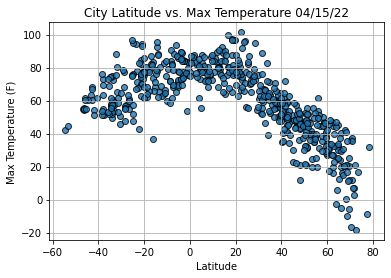

In [11]:
# Import time module
import time

# Building the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporating the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

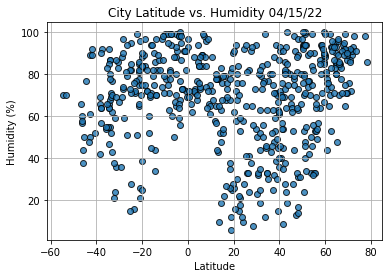

In [12]:
# Building the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporating the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

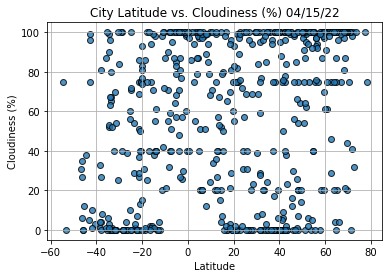

In [13]:
# Building the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporating the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

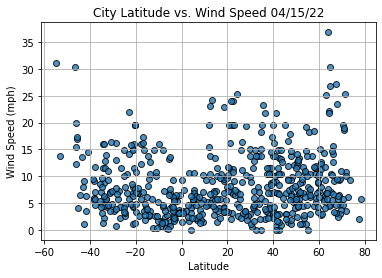

In [14]:
# Building the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", 
            linewidths=1, 
            marker="o",
            alpha=0.8, 
            label="Cities")

# Incorporating the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

# Creating Linear Regression Function

In [15]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [16]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

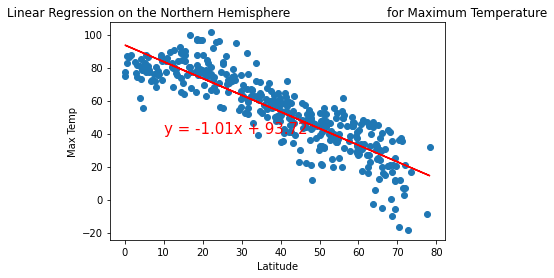

In [17]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

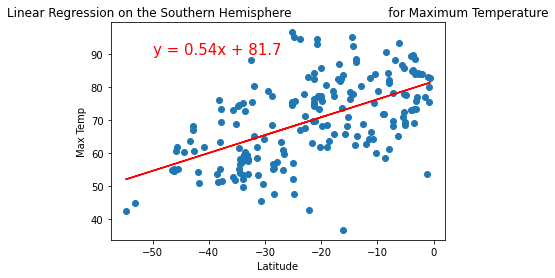

In [18]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

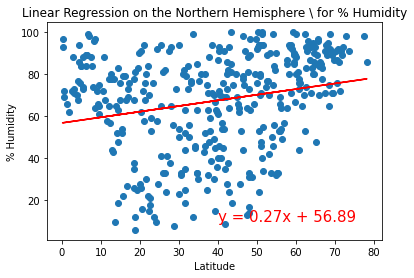

In [19]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Humidity',
                       '% Humidity',(40,10))

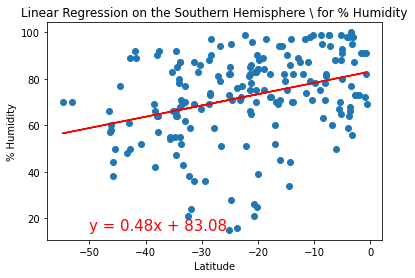

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Humidity', 
                       '% Humidity',(-50,15))

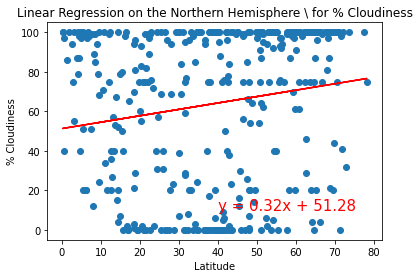

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for % Cloudiness',
                       '% Cloudiness',(40,10))

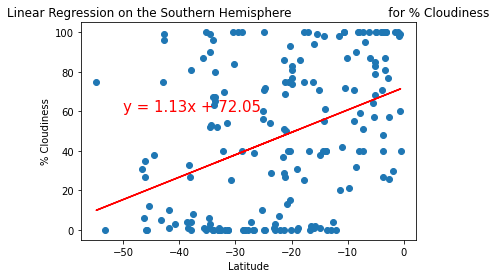

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

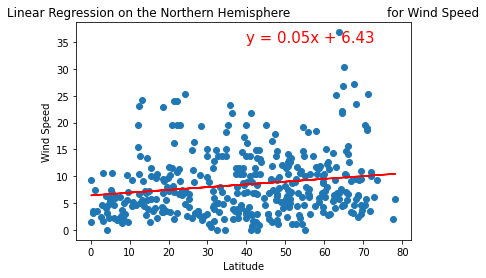

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

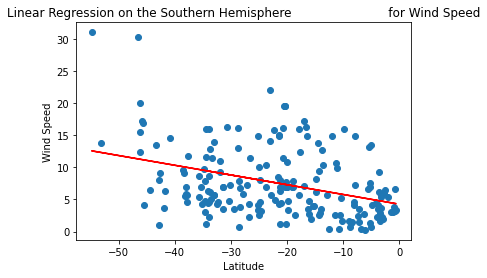

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))